In [70]:
import pandas as pd

datos = pd.read_csv("U4_01_housing.csv")

datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [71]:
datos["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [72]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [73]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='longitude', ylabel='latitude'>

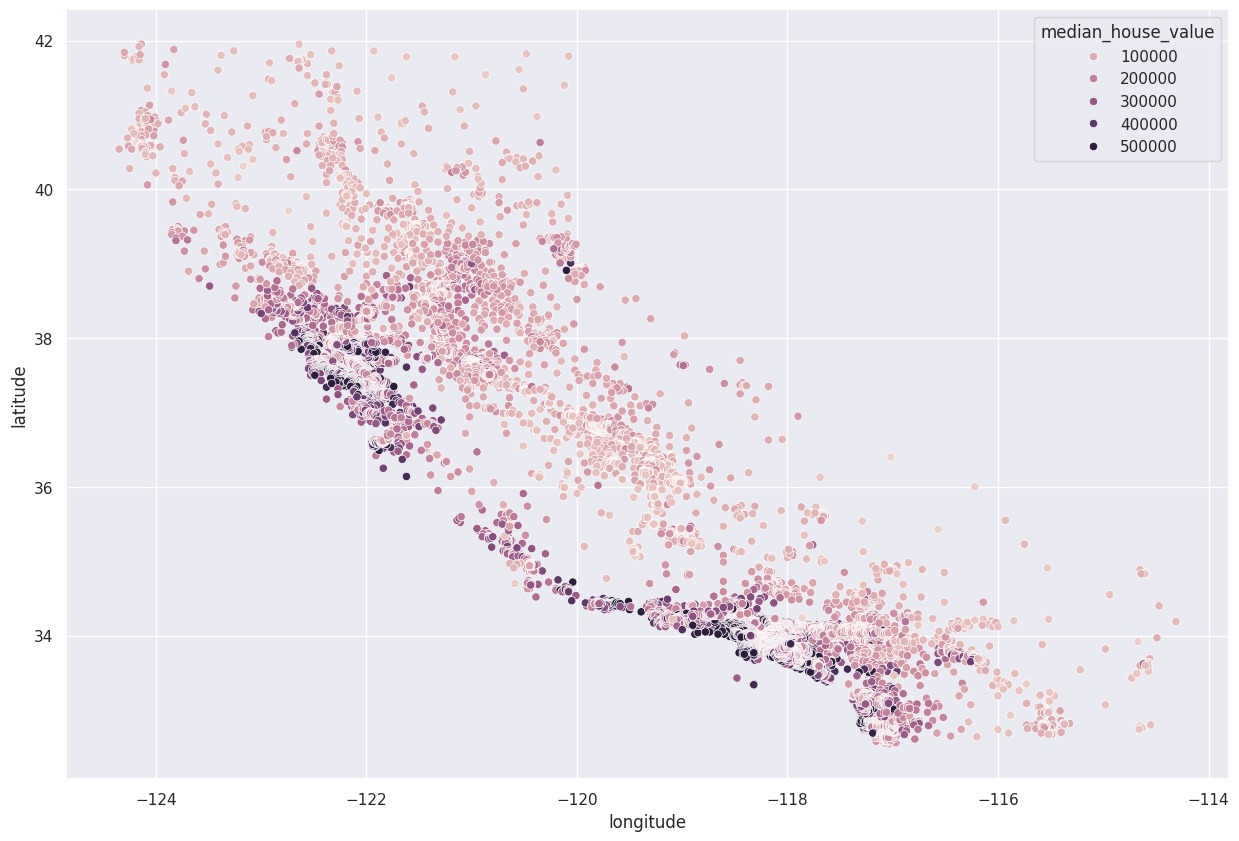

In [74]:
import seaborn as sns


sns.scatterplot(data=datos, x="longitude", y="latitude", hue="median_house_value")

In [75]:
datos_na = datos.dropna()

In [76]:
dummies = pd.get_dummies(datos_na["ocean_proximity"], dtype=int)

In [77]:
datos_na = datos_na.join(dummies)

In [78]:
datos_na.drop(columns=["ocean_proximity"], inplace=True)
datos_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

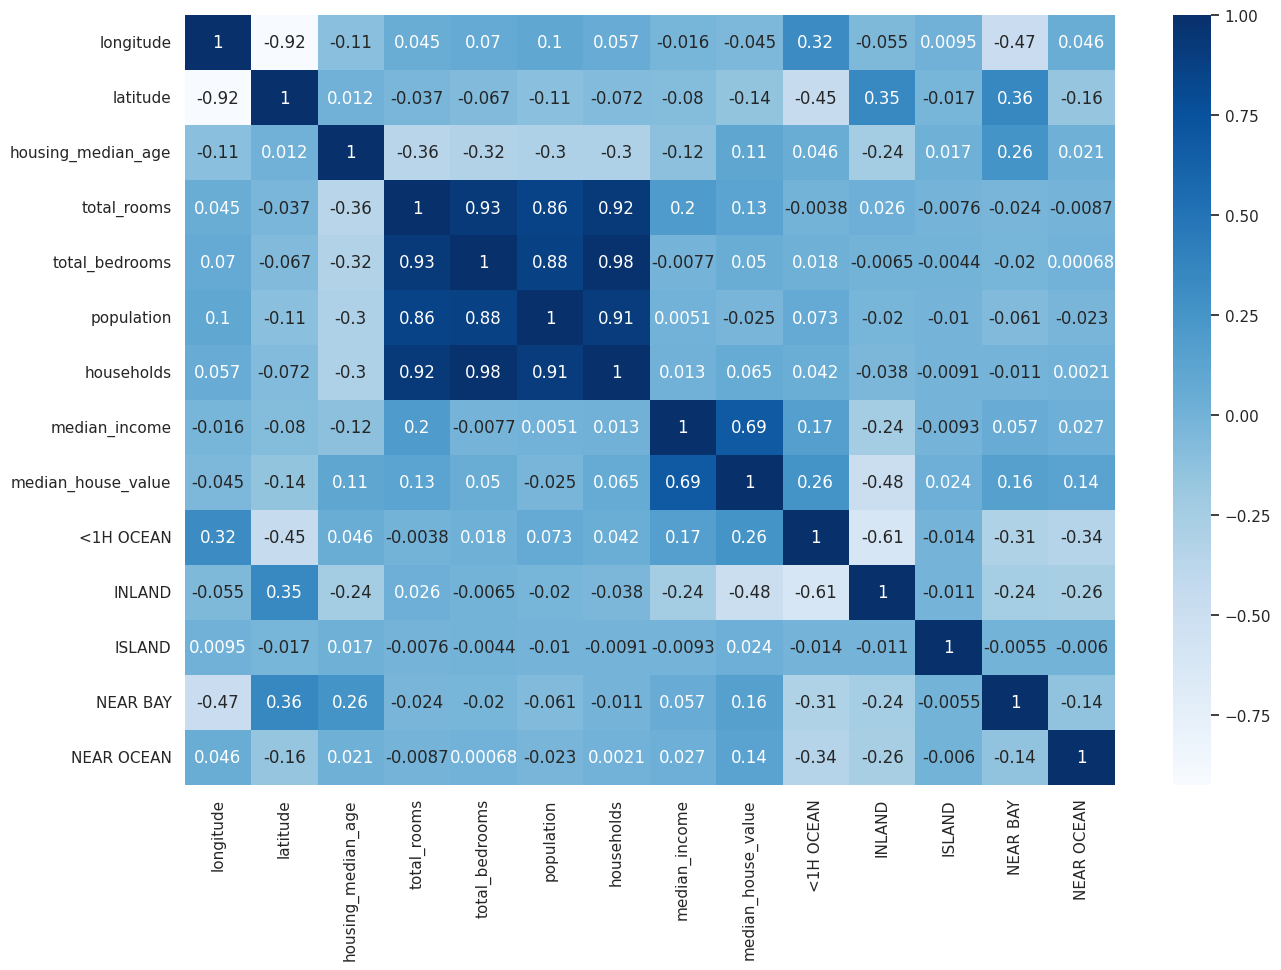

In [79]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.heatmap(datos_na.corr(),annot=True,cmap="Blues")

In [80]:
datos_na["bedroom_ratio"] = datos_na["total_bedrooms"] / datos_na["total_rooms"]


In [81]:
x = datos_na.drop(["median_house_value"], axis=1)
y = datos_na["median_house_value"]

In [82]:
from sklearn.model_selection import train_test_split

x_train, x_pru, y_train, y_pru = train_test_split(x, y, test_size=0.2)

In [83]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_train, y_train)

LinearRegression()

In [84]:
prediciones = modelo.predict(x_pru)

pd.DataFrame({"y_pru": y_pru, "prediciones": prediciones})

,y_pru,prediciones
3743,364700.0,180028.784055
2339,123300.0,133615.770196
17211,267000.0,247415.834541
13351,195100.0,181257.905858
6183,185400.0,197956.868984
...,...,...
4086,256300.0,248268.955309
10179,183200.0,223518.759387
1959,150900.0,119973.864587
18031,279400.0,323297.156144


In [85]:
#Calculo de overfitting
print(modelo.score(x_train, y_train))
print(modelo.score(x_pru, y_pru))

0.6512903772502662
0.6547821411850857


In [86]:
#Error
import sklearn.metrics as metrics
import numpy as np

metrics.mean_squared_error(y_pru, prediciones)**(1/2)

66873.50142279659

In [87]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
#Fit and transform the training data
x_esc_train = escalador.fit_transform(x_train)
#Only transform the test data using the fitted scaler from the training data
x_esc_pru = escalador.transform(x_pru)

In [88]:
modelo.fit(x_esc_train, y_train)

LinearRegression()

In [89]:
prediciones = modelo.predict(x_esc_pru)

pd.DataFrame({"y_pru": y_pru, "prediciones": prediciones})

,y_pru,prediciones
3743,364700.0,180028.784055
2339,123300.0,133615.770196
17211,267000.0,247415.834541
13351,195100.0,181257.905858
6183,185400.0,197956.868984
...,...,...
4086,256300.0,248268.955309
10179,183200.0,223518.759387
1959,150900.0,119973.864587
18031,279400.0,323297.156144


In [90]:
metrics.mean_squared_error(y_pru, prediciones)**(1/2)


66873.50142279647